In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [16]:
# Loading a csv data to pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [17]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [19]:
gold_data.shape

(2290, 6)

In [20]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
correlation = gold_data.corr()

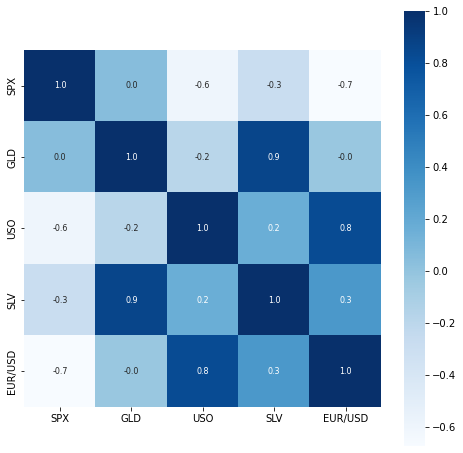

In [23]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot= True, annot_kws={'size':8}, cmap='Blues')

In [24]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


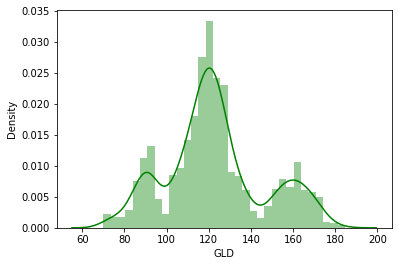

In [25]:
# Check the distribution of GLD price
sns.distplot(gold_data['GLD'],color='green')

In [29]:
X = gold_data.drop(['Date','GLD'], axis = 1)
Y = gold_data['GLD']

In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [31]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:



Random Forest Regressor

In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [35]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[168.68899908  82.12809973 116.27450061 127.58690058 120.74200093
 154.91949763 150.22289776 126.20180047 117.40039877 126.01830093
 116.65380126 172.03760087 141.50639836 167.7536984  115.10060014
 117.65570043 139.58440184 169.9132006  159.07200309 157.20179905
 154.86899966 125.33020017 175.8769996  157.04880344 125.20560035
  93.75099956  77.20419983 120.55760002 119.08239904 167.48969927
  88.09010084 125.09349975  91.2151011  117.69400048 121.19709915
 136.68550132 115.34700146 115.09910062 148.33399904 107.33870088
 104.34120219  87.34559804 126.45370069 118.00759993 152.45259857
 119.68230018 108.40859977 107.86029787  93.0960007  127.12609755
  75.15990028 113.67289917 121.21770026 111.16369918 118.98369889
 120.27519947 159.41489982 167.81760101 147.07349712  85.99689873
  94.29660035  86.86559929  90.54630001 118.82110106 126.47900053
 127.55479974 169.10560033 122.25859915 117.37649888  98.39740007
 167.90500159 143.15999841 131.81290231 121.12150232 120.90809945
 119.59530

In [38]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9881826222915862


Compare the actual values and Predicted Value

In [39]:
Y_test = list(Y_test)

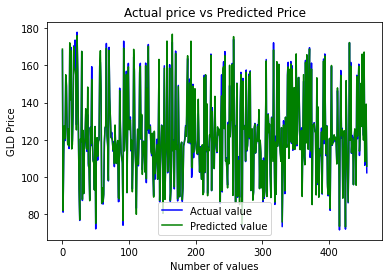

In [41]:
plt.plot(Y_test, color = 'blue', label='Actual value')
plt.plot(test_data_prediction, color='green', label = 'Predicted value')
plt.title('Actual price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()